<a href="https://colab.research.google.com/github/inepicone/nba_1/blob/main/my_first_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import  numpy             as np
import  scipy             as sc
import  matplotlib.pyplot as plt

from   sklearn.datasets   import make_circles

In [36]:
# creamos el dataset:

# para que me diga como se usa la funcion: make_circles?
# defino las variables:

# n, cantidad de puntos generados
n = 500

# p, cantidad de caracteristicas tenemos de cada uno de los n puntos:
p = 2

X, Y = make_circles(n_samples= n, factor = 0.5, noise = 0.1)

In [37]:
Y = Y[:, np.newaxis]

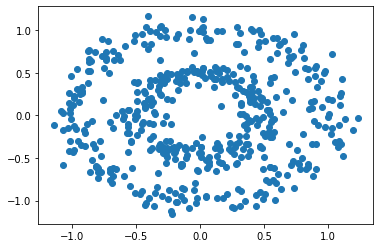

In [38]:
plt.scatter(X[:,0], X[:,1])
plt.show()

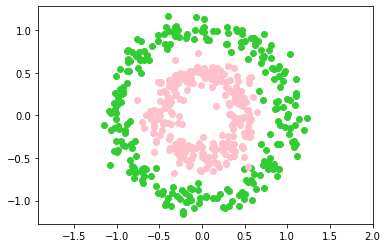

In [39]:
plt.scatter(X[Y [:, 0]==0,0], X[Y [:, 0]==0,1], c='limegreen')
plt.scatter(X[Y [:, 0]==1,0], X[Y [:, 0]==1,1], c='pink')
plt.axis('equal')
plt.show()


In [40]:
# clases de la capa de la red

class neural_layer():
  def __init__(self, n_con, n_neu, act_func):
    # n_con   = cantidad de conecciones
    # n_neur  = cantidad de neuronas
    # act:fun = funcion de activacion
    self.act_func = act_func
    
    # el vector bias es una columna y de la cantidad de neuronas como filas
    # le ponemos numeros random
    self.b        = np.random.rand(1, n_neu)     *2 -1
    self.W        = np.random.rand(n_con, n_neu) *2 -1


In [41]:
# Funcioiones de activacion:

sigm = (lambda x: 1 / ( 1 + np.e**(-x)) ,
        lambda x: x * (1 - x))



In [42]:
# funcion para crear la red neuronal:

# creo una variable capas como para decir cuantas variables tiene cada capa:
capas= [p, 4, 8, 6, 3, 1] # en este caso es clasificacion binaria, 1 neurona de salida

# tambien podria hacer vectores con otros hiperparametros, como el tipo de 
# funcion de activacion 
def create_rn(capas, act_func):
  
  nn = []
  
  for l, layer in enumerate(capas[:-1]):
      nn.append(neural_layer(capas[l], capas[l+1], act_func))

  return nn


In [43]:
create_rn(capas,sigm)

In [61]:
# hasta tenemos creada la red peeeero no tiene la matematica de fondo como para entrenarse y aprender...
# pasamos a hacer eso:

capas = [p, 4, 8, 6, 3, 1]
nn    = create_rn(capas,sigm)

# funcion de costo (en este caso pinto usar el error cuadratico medio):
l2_cost = (lambda Yr, Yp : np.mean((Yr - Yp)**2) ,
           lambda Yr, Yp : (Yr - Yp))

def train(nn, X, Y, l2_cost, lr=0.5, pred = True): 
  '''
    funcion que se va a encargar de entrenar nuestra red.
    paso hacia adelante,
    X,Y para comparar,
    funcion de costo
    lr = learning rate... paso con el cual me muevo al hacer el gradiente
  '''

  # foward pass:
  # sumas ponderadas + bias ---> y el resultado lo paso a la funcion de activacion:
  # suma ponderada = Z
  # con @ hago multiplicacion matricial:

  #z = X @ nn[0].W + nn[0].b
  ## ahora tengo que pasar a Z a la sigm
  #a = nn[0].act_func(z)

  # la idea es hacer lo anterior de forma iterativa:
  
  output = [(None, X)]
  
  for l, layer in enumerate(nn):
    z = output[-1][1] @ nn[l].W + nn[l].b
    a = nn[l].act_func[0](z)
    
    output.append((z,a))

  # ahora codeamos el algortimo de backpropagation:
  if pred:
    # backward
    # vamos calculando delta segun vamos para atras...
    # la delta de la ultima es la funcion de coste
    # vamos a almacenar en un vector
    deltas = []
    for l in reversed(range(0,len(nn))):
      z = output[l+1][0]
      a = output[l+1][1]
      # caso de la ultima capa:
      if l == len(nn)-1:
        deltas.insert(0, l2_cost[1](Y,a)*nn[l].act_func[1](a)) 
      # el resto:
      else:
        deltas.insert(0, deltas[0] @ _W.T * nn[l].act_func[1](a)) 
      
      _W = nn[l].W
      # gradiendisc.
      # porque lo anterior lo podemos usar para predecir.
      nn[l].b = nn[l].b - np.mean(deltas[0], axis=0, keepdims = True) * lr
      nn[l].W = nn[l].W - (output[l][1].T @deltas[0]) * lr
  
  return output[-1][1]


In [62]:
train(nn, X, Y, l2_cost, 0.5)

array([[0.41599532],
       [0.41727785],
       [0.41606771],
       [0.41674225],
       [0.41833468],
       [0.41765652],
       [0.41662305],
       [0.41563199],
       [0.41720987],
       [0.41994547],
       [0.41938098],
       [0.41737741],
       [0.41738913],
       [0.41409936],
       [0.41483398],
       [0.41316403],
       [0.41443571],
       [0.41816059],
       [0.41419648],
       [0.41648993],
       [0.4137095 ],
       [0.41416092],
       [0.41530737],
       [0.41443606],
       [0.41541434],
       [0.41928702],
       [0.41580991],
       [0.41788716],
       [0.41490621],
       [0.41931978],
       [0.41476402],
       [0.41180059],
       [0.41756611],
       [0.41778571],
       [0.4159042 ],
       [0.41713345],
       [0.41501463],
       [0.41230775],
       [0.41465609],
       [0.41356391],
       [0.41286918],
       [0.41742712],
       [0.41339766],
       [0.41322563],
       [0.4184705 ],
       [0.41177131],
       [0.41328843],
       [0.419

In [63]:
import time
from IPython.display import clear_output

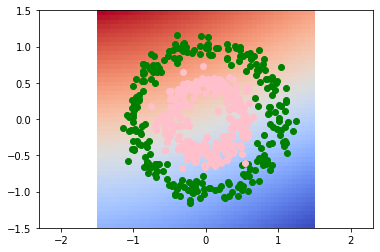

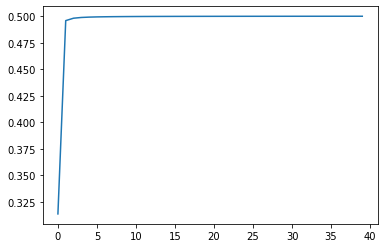

In [73]:
nn    = create_rn(capas,sigm)
loss  = []

for i in range(1000):
  # entrenamos:
  pV = train(nn, X, Y, l2_cost, 0.02)

  if i %25 ==0:
    loss.append(l2_cost[0](pV,Y))

    res = 50
    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res,res))

    for i0,x0 in enumerate(_x0):
      for i1,x1 in enumerate(_x1):
        _Y[ i0, i1 ] = train(nn, np.array([[x0,x1]]), Y, l2_cost, pred=False)[0][0]

  plt.pcolormesh(_x0, _x1, _Y, cmap='coolwarm')
  plt.axis('equal')

  plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0]==0,1], c='green')
  plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0]==1,1], c='pink')

  clear_output(wait=True)
  plt.show()
  plt.plot(range(len(loss)),loss)
  plt.show()
  time.sleep(0.5)
